# TP 1 et 2 audio (M1 SID) [EMMAB1J1 - Extraction d'information dans les signaux Texte Audio et Vidéo]

**NOM** : VEDIS

**Prénom** : Théo

**Email** : vedis.theo@gmail.com

**Partie 1** : Chargement fichier audio et comparaison de la variabilité 

Lien vers le support de cours : [cours.pdf](https://moodle.univ-tlse3.fr/pluginfile.php/256486/mod_resource/content/2/cours.pdf)

Initialisation de l'environnement de TP

In [3]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git

'cat' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'apt-get' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
Cloning into 'tp-3en-n7'...


In [1]:
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import scipy.signal
import numpy as np
from IPython.display import Audio

In [4]:
!ls tp-3en-n7/signaux/


'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


Utilisez la fonction scipy.io.wavfile.read pour charger le signal Loc1V1.wav (localisé ici : tp-3en-n7/signaux/Loc1V1.wav). Renseignez- vous sur l’utilisation de cette fonction en regardant la doumentation en ligne de scipy.io.
**Quelle est la fréquence d’échantillonage de ce fichier ? Est-ce bien en 16 KHz ?**

In [5]:
(fe,signal) = scipy.io.wavfile.read("tp-3en-n7/signaux/Loc1V1.wav")
print(fe) # La fréquence est bien de 16 KHz !
# print(signal)

16000


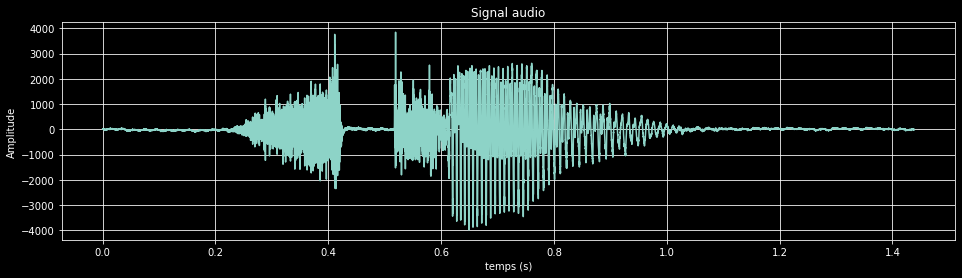

In [6]:
# Affichage du signal
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal))/fe,signal)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

In [6]:
# lecture du fichier
Audio(data=signal, rate=fe)

***Affichage d'une partie des échantillons... (entre 9650 et 9700 par exemple)***

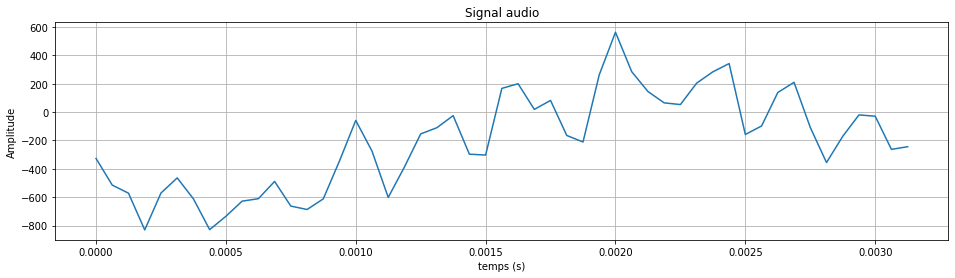

In [7]:
# Affichage des échantillons entre 9650 et 9700
# à vous...
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal[9650:9701]))/fe,signal[9650:9701])
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()

Affichage du spectrogramme  : 

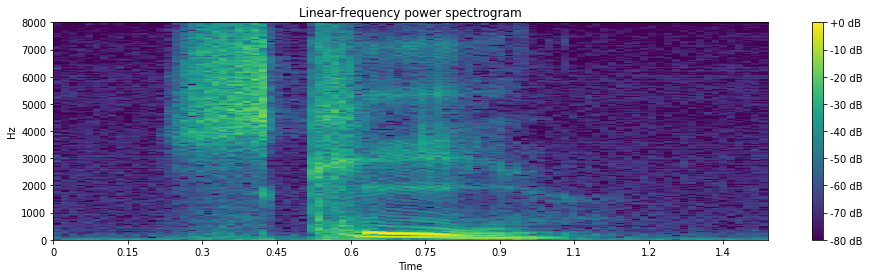

In [8]:
import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

La lecture d'un enregistrement à 16 KHz forcée à 8 KHz va donner ceci :

In [9]:
Audio(data=signal, rate=fe/2)

Et la lecture au double de la fréquence ceci :

In [10]:
Audio(data=signal, rate=fe*2)

Q : ***Qu'obversez vous au niveau des fréquences ? Est-ce normal ?***

Votre réponse : Quand la fréquence diminues, le son devient plus grave et il est plus lent, au contraire quand la fréquence augmente le son devient aigue et rapide!

Q : ***Conformément au théorème de Shannon, une fréquence échantillonnage de 16kHz est-elle adaptée à la numérisation de la parole ? Appuyez vous sur les valeurs théoriques de l’étendue du spectre de la parole.***

Votre réponse : Le thérome de Shannon nous dit que : fe doit être le double de fmax.Le spectre du signal analogique de la parole a une frequence maximal de 8 kHz, donc une fréquence d'échantillonage de 16 kHz est adaptée pour la numérisation de la parole!

Q : ***Qu’est ce qu’un phonème ? Combien de phonèmes apparaissent dans le signal Loc1V1 ? Isolez-les dans des variables séparées.***

Votre réponse : Un phonème est un élément sonore du langage parlé
Loc1V1 se compose d'un seul Phonèmes : \ski\

In [11]:
# votre code...
s = (int(0.2 * 16000), int(0.42*16000))
print(s)
Audio(data=signal[s[0]:s[1]], rate=fe)

(3200, 6720)


In [12]:
k = (int(0.42 * 16000), int(0.60*16000))
print(k)
Audio(data=signal[k[0]:k[1]], rate=fe)

(6720, 9600)


In [13]:
i = (int(0.60 * 16000), int(0.8*16000))
print(i)
Audio(data=signal[i[0]:i[1]], rate=fe)

(9600, 12800)


Q : ***Quelle est la différence entre un son voisé et un son non-voisé ?***

Votre réponse : Un son voisé, c'est un son caractérisé par la vibration des cordes vocales a l'inverse un son non voisé ne necessite pas la vibration des cordes vocales pour être émis.


***Isolez dans des variables séparées une fenetre de 512 poits de signal voisé et une autre avec du signal non voisé. Affichez les fenêtres.***

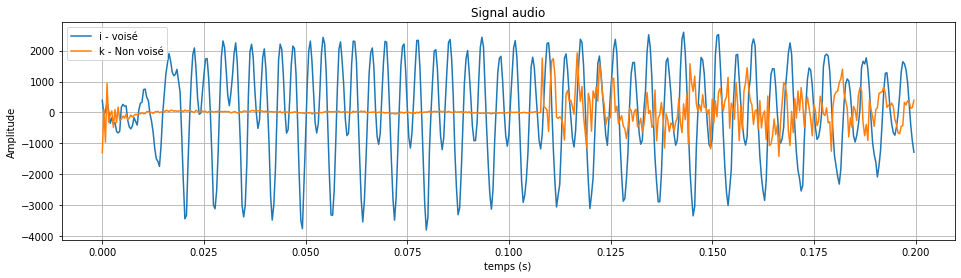

In [14]:
# Votre code...
plt.figure(1, figsize=(16, 4))

x = np.linspace(i[0], i[-1], num=512, dtype=int)
plt.plot(np.arange(len(x))*(i[-1]-i[0])/512/fe, signal[x], label="i - voisé")

x = np.linspace(k[0], k[-1], num=512, dtype=int)
plt.plot(np.arange(len(x))*(i[-1]-i[0])/512/fe, signal[x], label="k - Non voisé")

plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.legend()
plt.show()


**Le même mot est prononcé une nouvelle fois par le même locuteur : Loc1V2.wav. Affichez les signaux, écoutez les, et observerez les différences existantes entre ces deux réalisations.**

In [15]:
Audio(signal, rate=fe) # Loc1V1

In [16]:
# votre code...
(fe2,signal2) = scipy.io.wavfile.read("tp-3en-n7/signaux/Loc1V2.wav")
Audio(signal2, rate=fe2) # Loc2V2
# La deuxieme prononciation est beaucoup plus faible

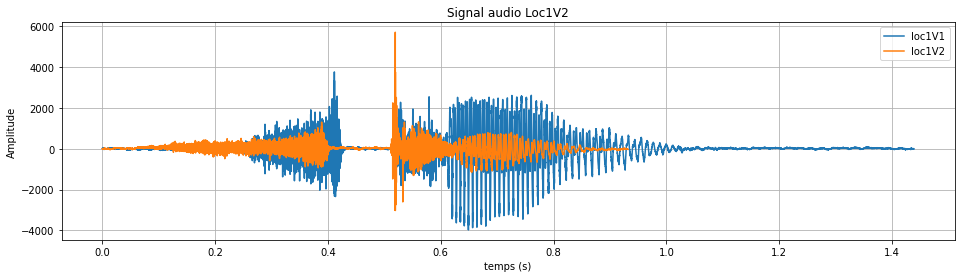

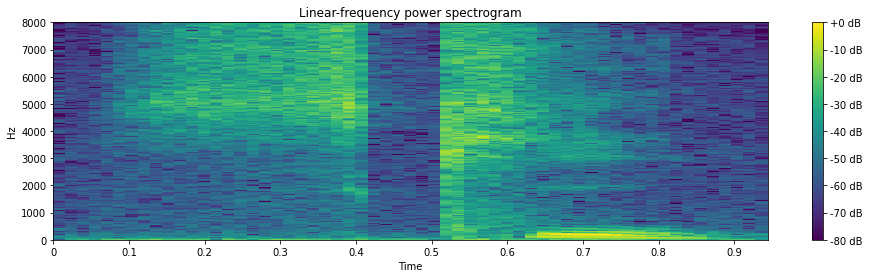

In [17]:
# Affichage du signal Loc1V1 / Loc1V2
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal))/fe,signal, label="loc1V1")
plt.plot(np.arange(len(signal2))/fe,signal2, label="loc1V2")
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio Loc1V2')
plt.grid(True)
plt.legend()
plt.show()
# ----
d, sr = librosa.load('tp-3en-n7/signaux/Loc1V2.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

reponse: Le phonème s est plus long, le k a une plus grande amplitude et le i a une amplitude plus faible et est plus court

***Comparez ensuite les réalisation du même mot par deux locuteurs différents (fichiers Loc1V1 et Loc2V1). Discutez les causes possibles des différences observées entre deux réalisations.***

In [18]:
# votre code
(fe3,signal3) = scipy.io.wavfile.read("tp-3en-n7/signaux/Loc2V1.wav")
Audio(signal3, rate=fe3) #Loc2V1

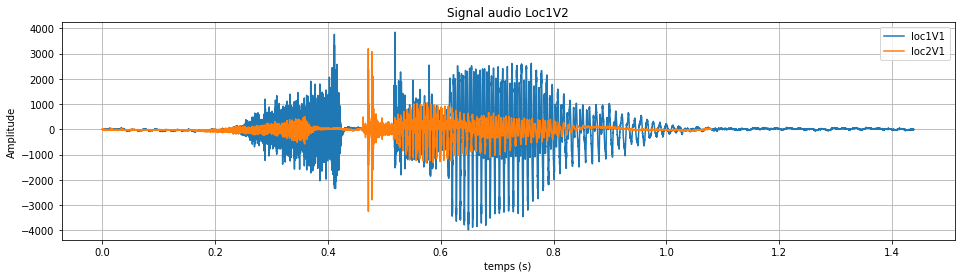

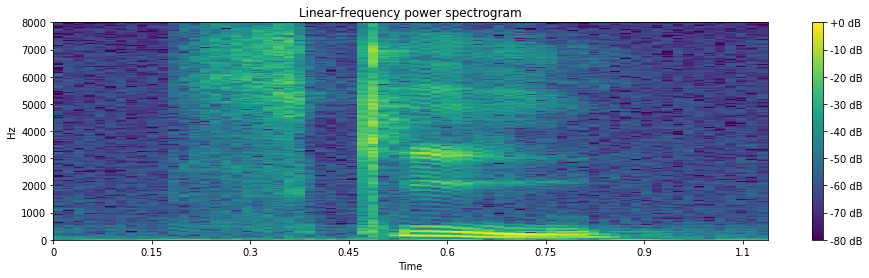

In [19]:
# Affichage du signal Loc1V1 / Loc1V2
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal))/fe,signal, label="loc1V1")
# plt.plot(np.arange(len(signal2))/fe,signal2, label="loc1V2")
plt.plot(np.arange(len(signal3))/fe,signal3, label="loc2V1")
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio Loc1V2')
plt.grid(True)
plt.legend()
plt.show()
# ----
d, sr = librosa.load('tp-3en-n7/signaux/Loc2V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

reponse: le mot est prononcé plus rapidement, les phonèmes s et i ont une amplitude plus faible sur le Loc2. Loc1 a une voix plus aigus. 

***Enregistrez votre propre voix (vous pouvez utiliser le programme wavesurfer). Utilisez par exemple cette phrase : "Le public est ému par Debussy". Affichez le signal, le spectrogramme et repérez les différents phonèmes qui composent votre production. Comparez avec ce qui a été fait en cours.***

In [25]:
from google.colab import files
uploaded = files.upload()
!ls

Saving sonTpAudio.wav to sonTpAudio.wav
sample_data  sonTpAudio.wav  tp-3en-n7


In [26]:
# votre code
(fe4,signal4) = scipy.io.wavfile.read("sonTpAudio.wav")
# Audio(filename="sonTpAudio.wav")
Audio(data=signal4, rate=fe4)

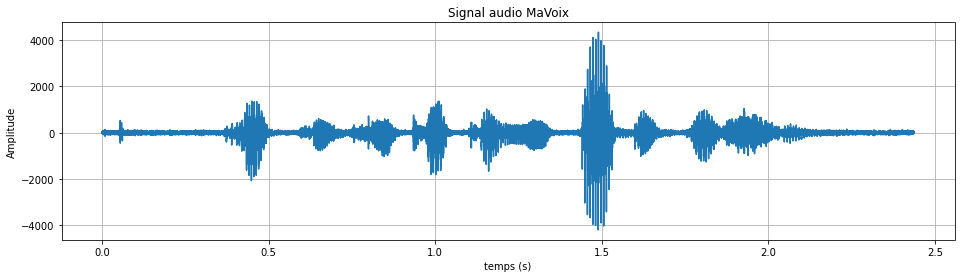

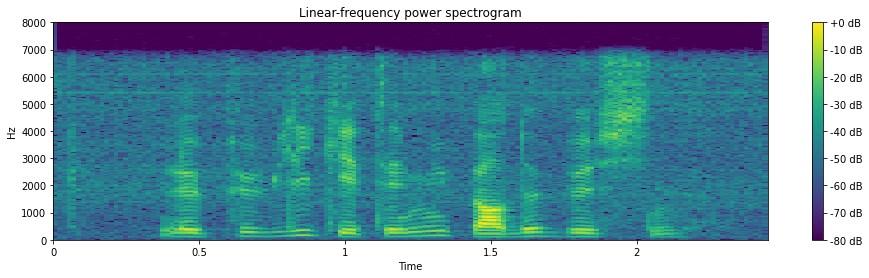

In [27]:
# Affichage du signal sonTpAudio.wav
plt.figure(1, figsize=(16, 4))
plt.plot(np.arange(len(signal4))/fe4,signal4)
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal audio MaVoix')
plt.grid(True)
plt.show()

######### spectrogram
import librosa
import librosa.display
d, sr = librosa.load('sonTpAudio.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

In [28]:
# Les phonèmes présents dans cette phrase sont :
# [lə] [py] [blik] [ɛ] [em] [y] [paʁ] [də] [by] [si].

***Concluez sur cette partie en prenant en considération le nombre important de causes extérieures de la variabilité temporelle du signal de parole. Ces phénomènes limitent les possibilités d’une analyse plus poussée dans le domaine temporel dans lequel le signal de parole se comporte comme un signal aléatoire.***

Votre réponse...

**Partie 2** : Paramétrisation

In [29]:
!tree tp-3en-n7/signaux/alpha/

tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


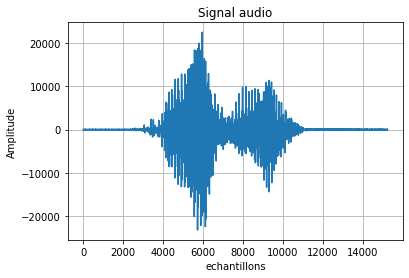

In [30]:
(fe,signal) =  scipy.io.wavfile.read("tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

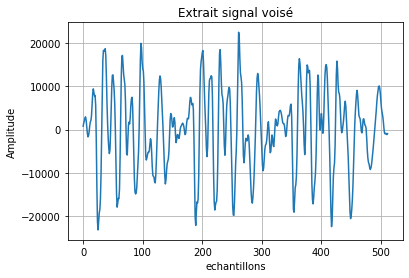

In [31]:
extrait = signal[5700:6212]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

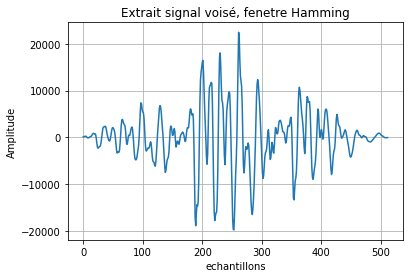

In [32]:
# a vous
extrait_fenetre = np.hamming(512)
plt.plot(extrait*extrait_fenetre)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé, fenetre Hamming')
plt.grid(True)
plt.show()

***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

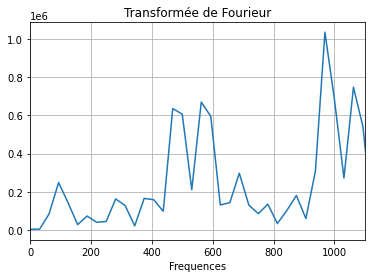

In [33]:
# A vous...
plt.plot(np.fft.fftfreq(512, 1/fe)[:256], abs(np.fft.fft(extrait_fenetre*extrait))[:256])
plt.xlabel('Frequences')
plt.title('Transformée de Fourieur')
plt.grid(True)
plt.xlim(0,1100)
plt.show()


***Affichez un spectrogramme du signal de départ.***

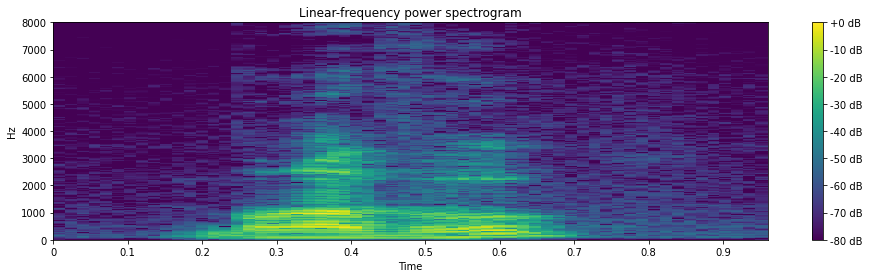

In [34]:
# A vous...
import librosa
import librosa.display
d, sr = librosa.load('tp-3en-n7/signaux/alpha/references/bravo.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(d, n_fft=512, hop_length=256, window=np.hanning(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(16, 4))
librosa.display.specshow(sp, sr=16000, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

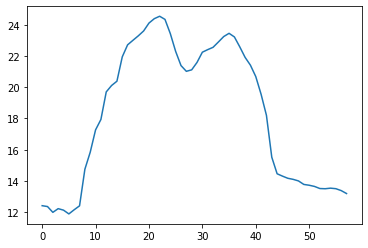

In [35]:
# A vous
import math
E = []
i = 0
while i + 512 <= len(signal):
  E.append(math.log(sum([x**2 for x in signal[i:i+512]])))
  i += 256

# plt.plot(E)
E2 = []
for i in E:
  for j in range(256):
    E2.append(i/max(E))

plt.plot(E)
plt.show()

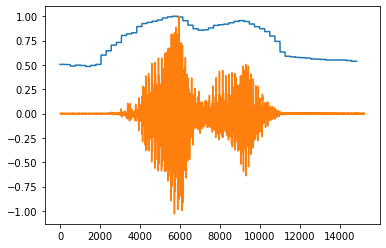

In [36]:
plt.plot(E2)
plt.plot(signal/max(signal))
plt.show()

***Peut-on repérer les voyelles facilement avec cette représentation ?***

Réponse: Les voyelles sont situé la où l'énergie est la plus forte, donc oui cette réprésentation permet de les repérés plus facilement

***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


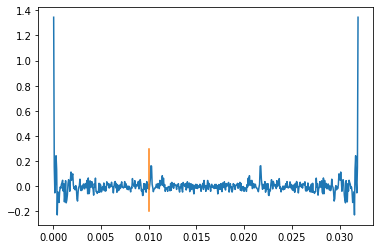

In [37]:
# A vous...
cepstre = np.fft.ifft(np.array([math.log(x) for x in abs(np.fft.fft(extrait))]))
plt.plot(np.arange(0, len(extrait)/fe, 1/fe)[1:], cepstre[1:])
plt.plot([0.010, 0.010], [-0.2,0.3])
plt.show()

Réponse: En orange la frequence fondamental liée à la vibration des cordes vocales

***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC 
du signal de départ.***

20


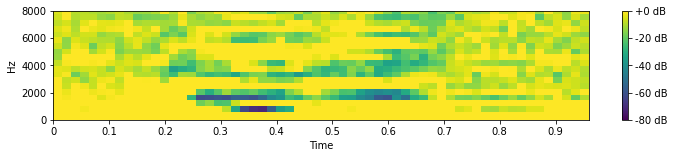

In [158]:
# A vous...
# print(signal)
mfcc = librosa.feature.mfcc(signal.astype(float), sr=fe, n_fft=512, hop_length=256, )
print(len(mfcc))
plt.figure(figsize=(12,2))
librosa.display.specshow(mfcc, sr=fe, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.show()


***Ajoutez a cette matrice votre propre calcul de l'énergie normalisé. Y a-t-il une corrélation avec un des coefficients MFCC ?***

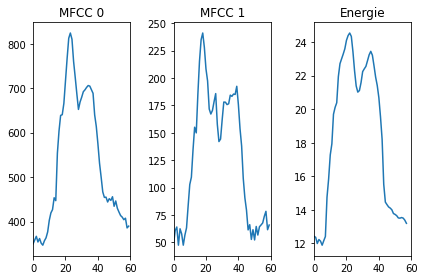

58 60 20


In [145]:
# A vous...
plt.subplot(1,3,1)
plt.plot(mfcc[0,:])
plt.title("MFCC 0")
plt.xlim(0,60)
plt.subplot(1,3,2)
plt.plot(mfcc[1,:])
plt.title("MFCC 1")
plt.xlim(0,60)
plt.subplot(1,3,3)
plt.plot(E)
plt.title("Energie")
plt.xlim(0,60)
plt.tight_layout()
plt.show()
print(len(E), len(mfcc[0]), len(mfcc))

Réponse...

***En utilisant les MFCC, mettez en place un détecteur d'activité vocale afin de filtrer les fichiers que vous avez à traiter : visualisez le résultats sur les signaux "references" (affichage du signal et matérialisation des zones de silence). Vous ne devez pas altérer les zones de silences de moins de 300 ms comprises dans les zones de parole.***

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

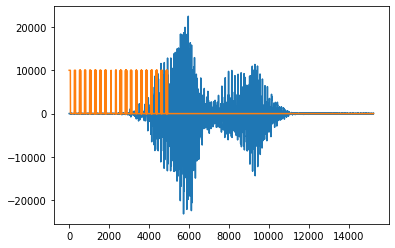

15235

In [146]:
# A vous...
parole = [0 for i in range(len(signal))]
for i in range(len(mfcc)):
  for j in range(len(mfcc[i])):
    if mfcc[i][j] > 0:
      parole[i*256 + j] = 1*10000

print(parole)
plt.plot(signal)
plt.plot(parole)
plt.show()
len(signal) 